In [2]:
import pickle 
import numpy as np
import pandas as pd 
from tqdm import tqdm
import matplotlib.pyplot as plt
import os

In [ ]:
def create_folder(directory:str):
	if not os.path.exists(directory):
		os.makedirs(directory)
		
MODELS =  ["TimePlex_base", "TimePlex", "TComplex_lx", "TNTComplex_lx"]
granularities = ["D", "Y"]
temporal_scopes = ["TR", "FD"]

TimePlex_base


100%|██████████| 51/51 [00:19<00:00,  2.64it/s]


TimePlex


100%|██████████| 51/51 [00:18<00:00,  2.74it/s]


TComplex_lx


100%|██████████| 51/51 [00:18<00:00,  2.69it/s]


TNTComplex_lx


100%|██████████| 51/51 [00:18<00:00,  2.76it/s]


TimePlex_base
/FD_D_Extra_Small could not be computed
TimePlex_base


100%|██████████| 51/51 [00:20<00:00,  2.52it/s]


TimePlex


100%|██████████| 51/51 [00:20<00:00,  2.51it/s]


TComplex_lx


100%|██████████| 51/51 [00:20<00:00,  2.46it/s]


TNTComplex_lx


100%|██████████| 51/51 [00:21<00:00,  2.36it/s]


TimePlex_base


100%|██████████| 51/51 [00:23<00:00,  2.20it/s]


TimePlex


100%|██████████| 51/51 [00:22<00:00,  2.28it/s]


TComplex_lx


100%|██████████| 51/51 [00:21<00:00,  2.32it/s]


TNTComplex_lx


100%|██████████| 51/51 [00:22<00:00,  2.27it/s]


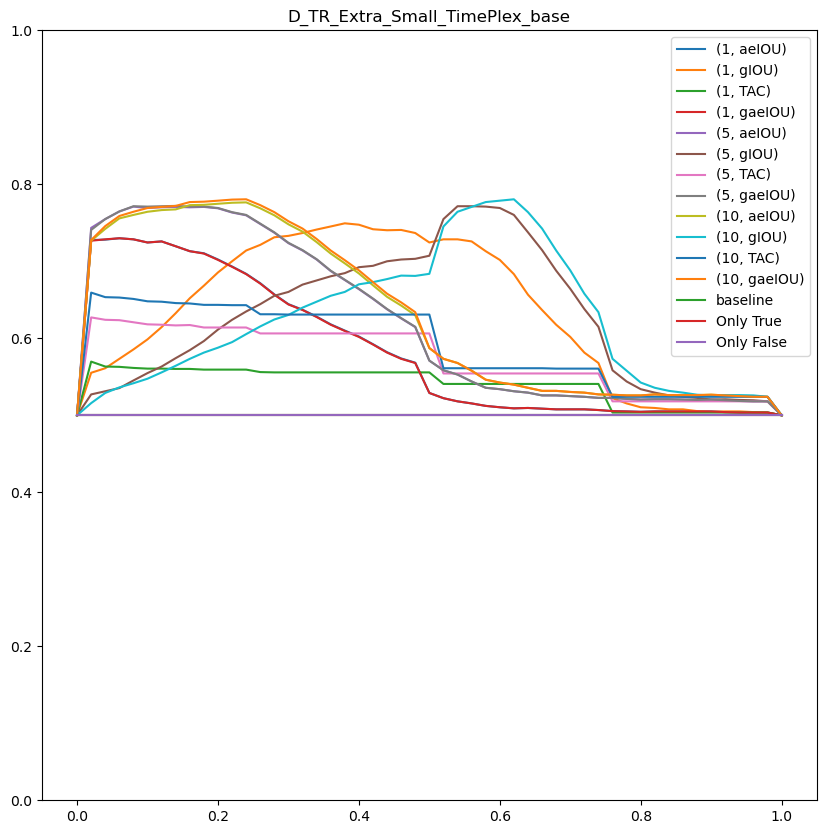

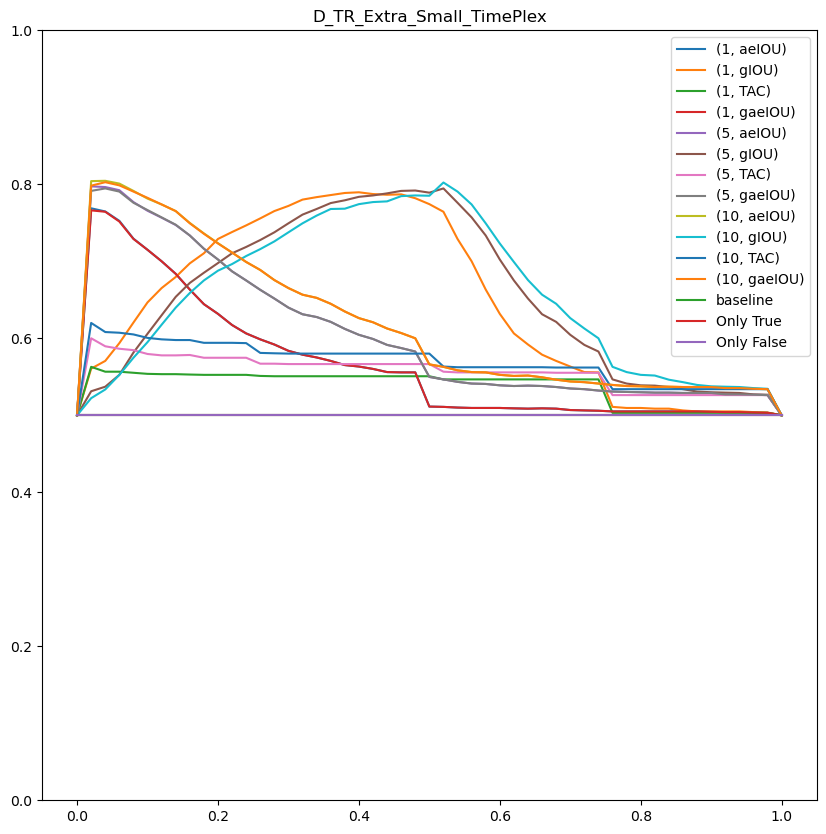

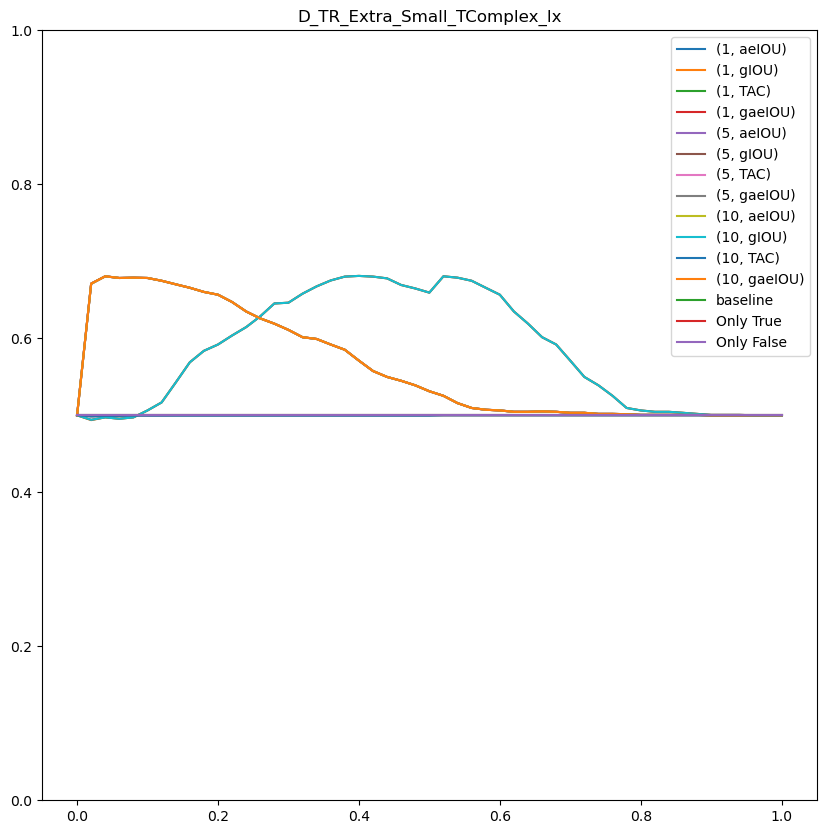

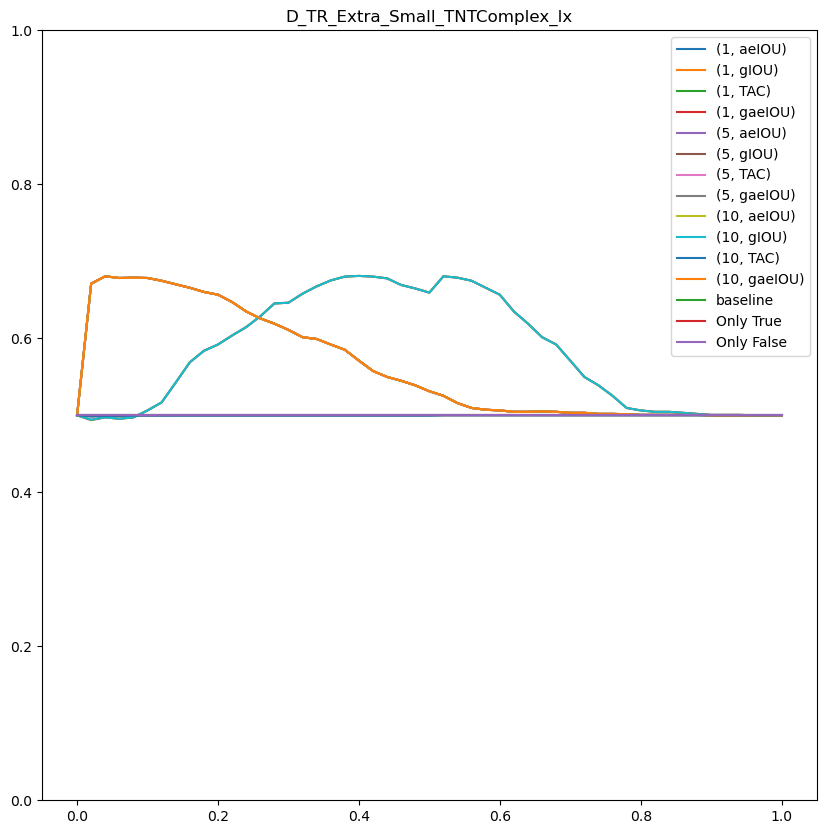

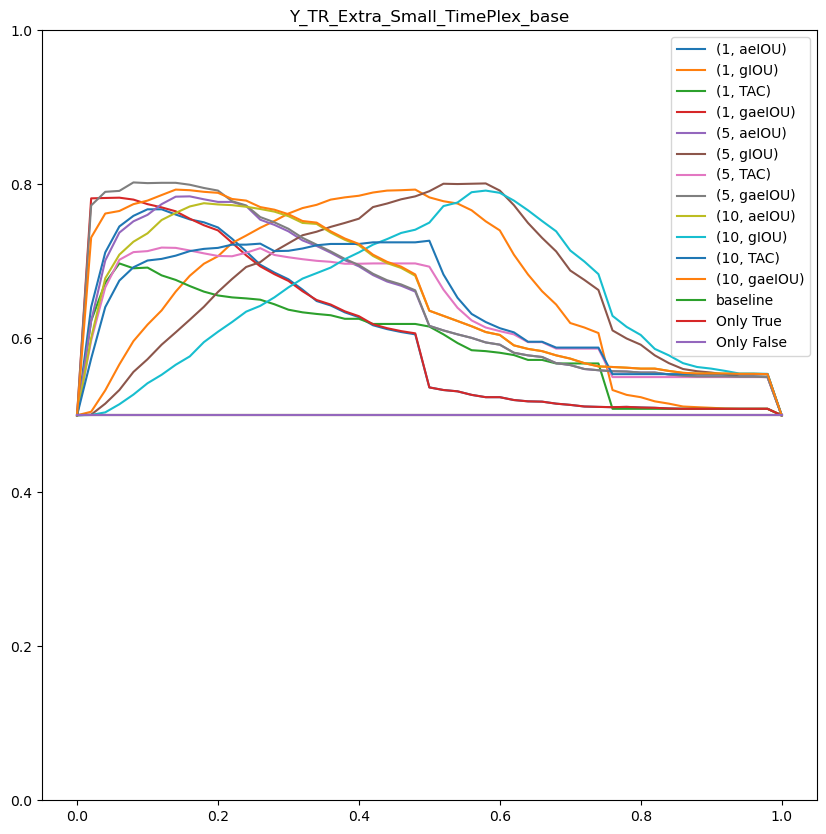

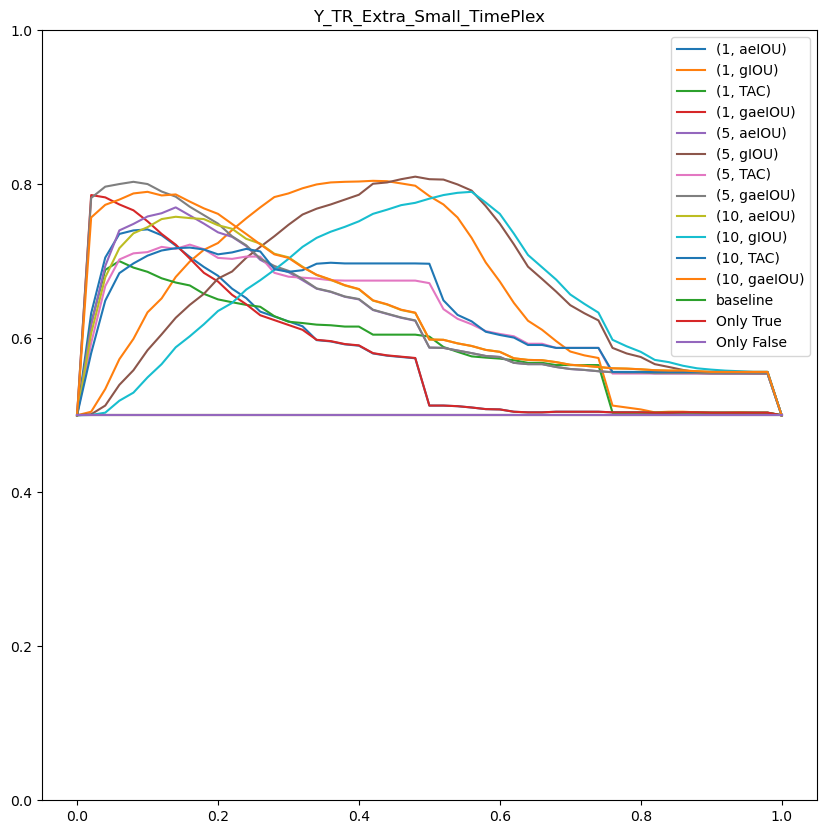

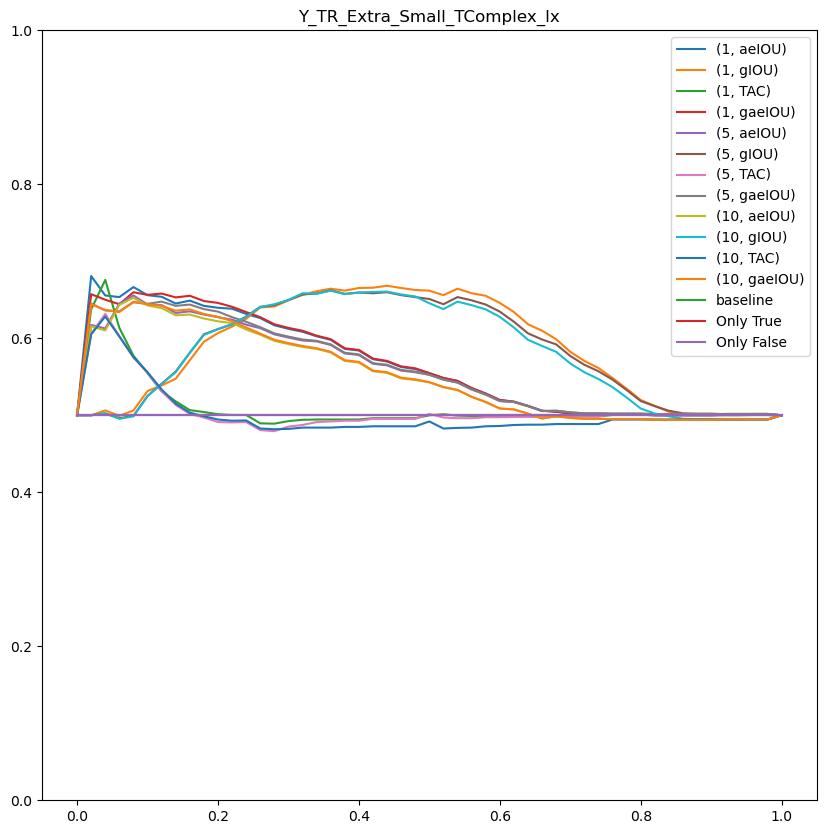

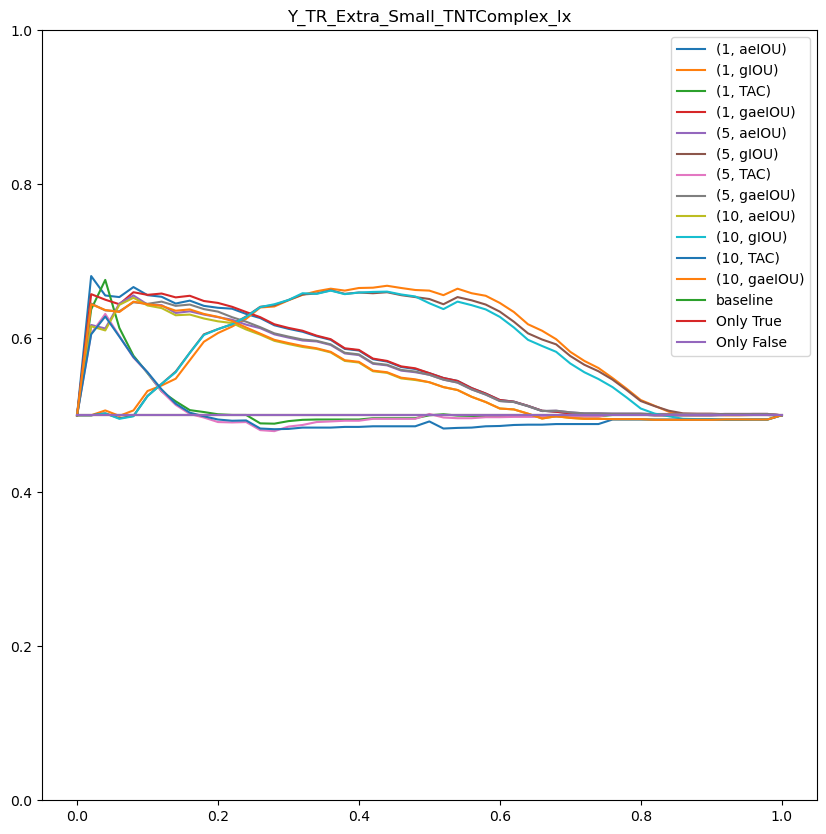

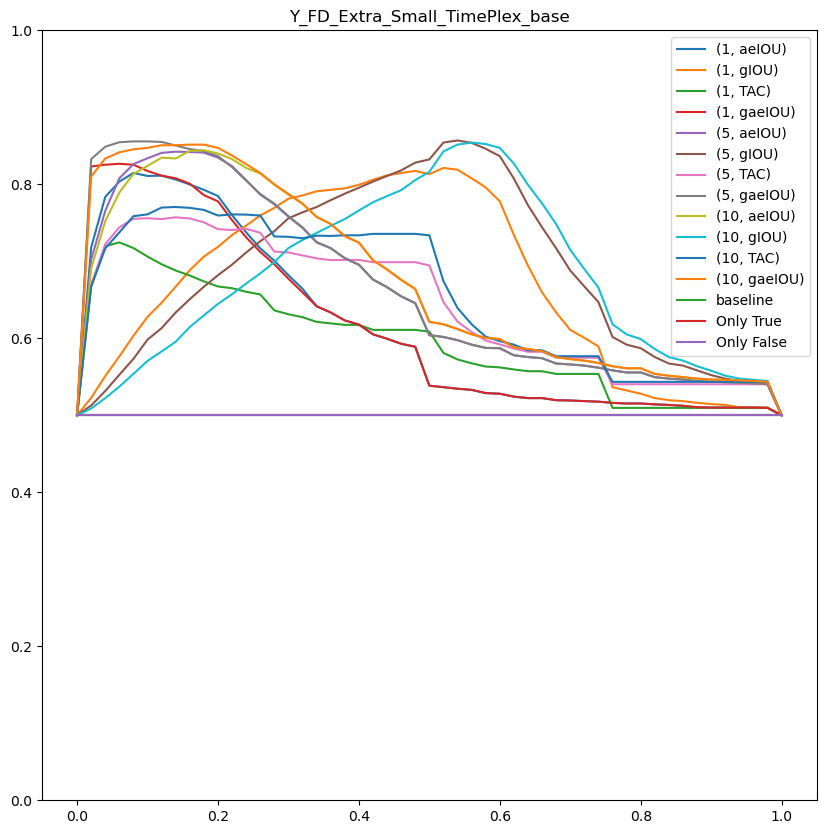

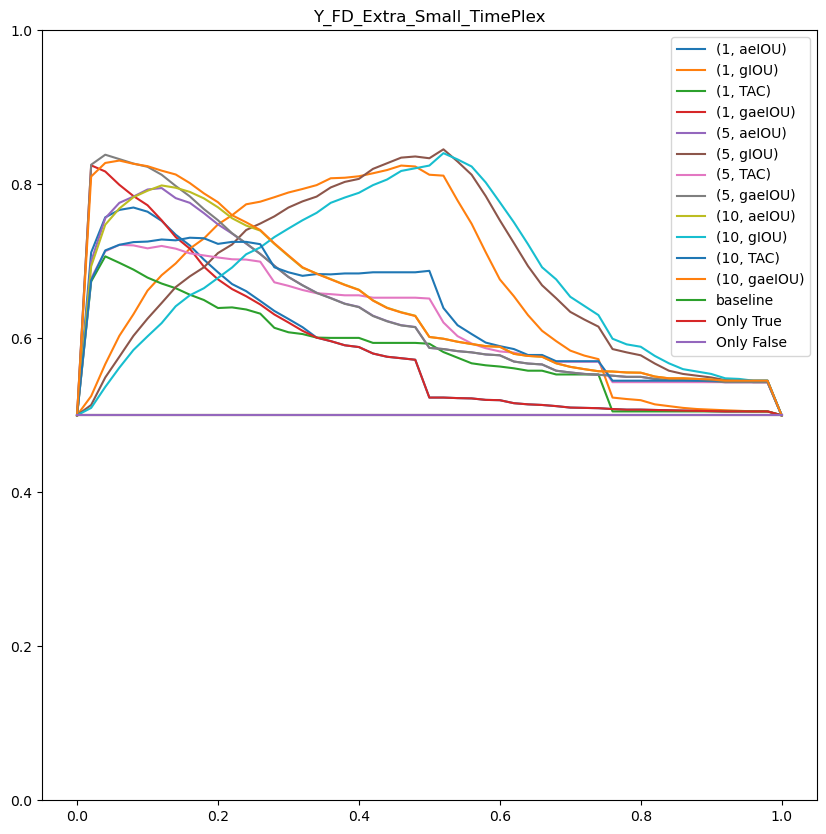

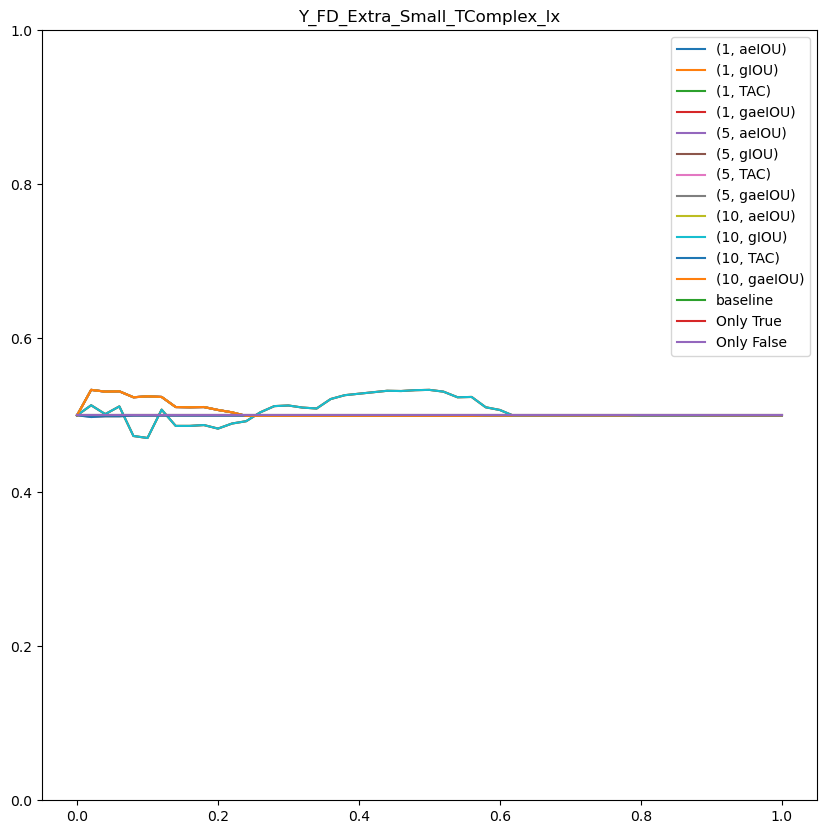

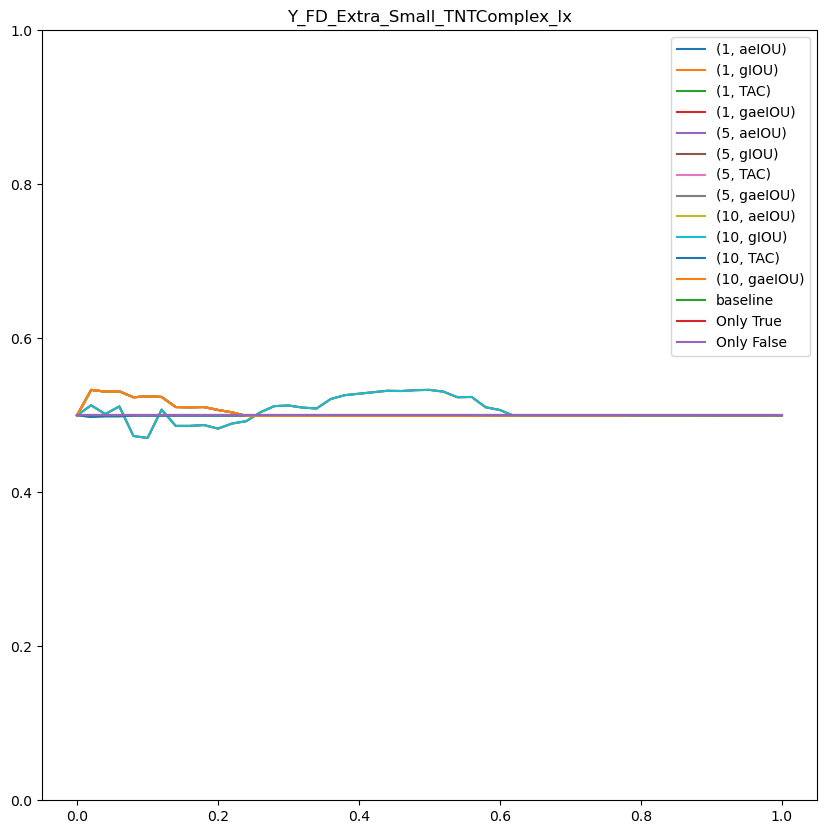

In [ ]:
SIZE = "Extra_Small"

for granularity in granularities:
	for temporal_scope in temporal_scopes:
		root_res_server = f"./../Res_server/{temporal_scope}_{granularity}_{SIZE}/"
		root_data= f"./../data/{temporal_scope}_{granularity}_{SIZE}/ValidationTask/"

		gt = pd.read_csv(f"{root_data}test.gt", names=[("GT", "GT")])
		try: 
			for model in MODELS: 
				print(model)
				res = pickle.load(open(f"{root_res_server}/{model}_test_time_scores_analysis", "rb"))
				data = []
				columns = res["scores_dict"].keys()
				for i in range(len(gt)):
					data.append([])
					for k in columns:
						data[-1].append(float(res["scores_dict"][k][i]))
				pred = pd.DataFrame(data, columns=columns)
				pred = pred.merge(right_index=True, left_index=True, right=gt)

				res = []
				pres = 4
				s, e, step = (0, 1.0001, 0.02)
				for t in tqdm(np.arange(s, e, step)):
					res.append([])
					for k in [1,5,10]:
						for metric in ["aeIOU", "gIOU", "TAC", "gaeIOU"]:
							# print("\t", k, sum(pred[[k, "GT"]].apply(lambda x: (x[k] > t) == x["GT"], axis=1)))
							#acc_neg = np.around(sum(pred[[(k, metric), ("GT", "GT")]][pred[("GT", "GT")] == False].apply(lambda x: (x[(k, metric)] >= t) == x[("GT", "GT")], axis=1))/sum(pred[("GT", "GT")] == False), pres)
							#acc_pos = np.around(sum(pred[[(k, metric), ("GT", "GT")]][pred[("GT", "GT")] == True].apply(lambda x: (x[(k, metric)] >= t) == x[("GT", "GT")], axis=1))/sum(pred[("GT", "GT")] == True), pres)
							acc = np.around(sum(pred[[(k, metric), ("GT", "GT")]].apply(lambda x: (x[(k, metric)] > t) == x[("GT", "GT")], axis=1))/len(pred), pres)
							res[-1].append(acc)
							# res[-1].append(acc_pos)
							# res[-1].append(acc_neg)
				# pd.DataFrame(res, index=np.arange(0,1.01,0.05), columns=[(k, metric+metric_selected) for k in [1,5,10] for metric in ["aeIOU", "gIOU", "TAC"] for metric_selected in ["", "_pos", "_neg"]])
				final_pred = pd.DataFrame(res, index=np.arange(s, e, step), columns=[(k, metric) for k in [1,5,10] for metric in ["aeIOU", "gIOU", "TAC", "gaeIOU"]])
				final_pred["baseline"] = np.ones(len(final_pred.index))*0.5
				final_pred["Only True"] = np.ones(len(final_pred.index))*pred[("GT", "GT")].value_counts()[True]/sum(pred[("GT", "GT")].value_counts())
				final_pred["Only False"] = np.ones(len(final_pred.index))*pred[("GT", "GT")].value_counts()[False]/sum(pred[("GT", "GT")].value_counts())
				final_pred.plot(ylim=[0,1], figsize=(10,10), title=f"{granularity}_{temporal_scope}_{SIZE}_{model}")
		except:
			print(f"/{temporal_scope}_{granularity}_{SIZE} could not be computed")

TimePlex_base
/TR_D_Small could not be computed
TimePlex_base
/FD_D_Small could not be computed
TimePlex_base


100%|██████████| 51/51 [08:13<00:00,  9.68s/it]


TimePlex


100%|██████████| 51/51 [08:16<00:00,  9.74s/it]


TComplex_lx


100%|██████████| 51/51 [09:23<00:00, 11.04s/it]


TNTComplex_lx


100%|██████████| 51/51 [10:21<00:00, 12.18s/it]


TimePlex_base
/FD_Y_Small could not be computed


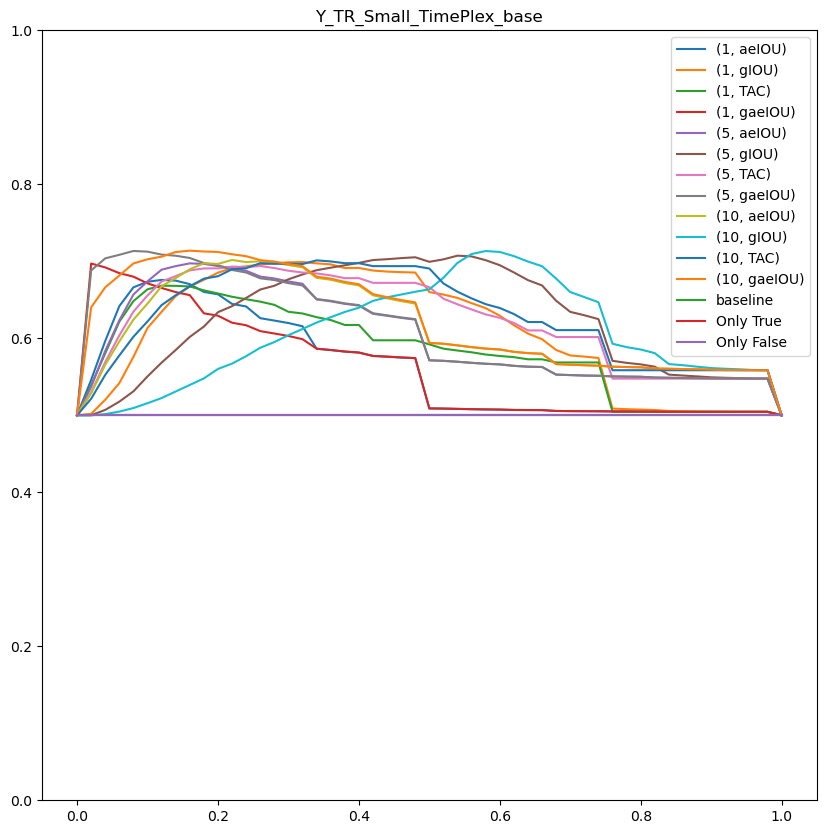

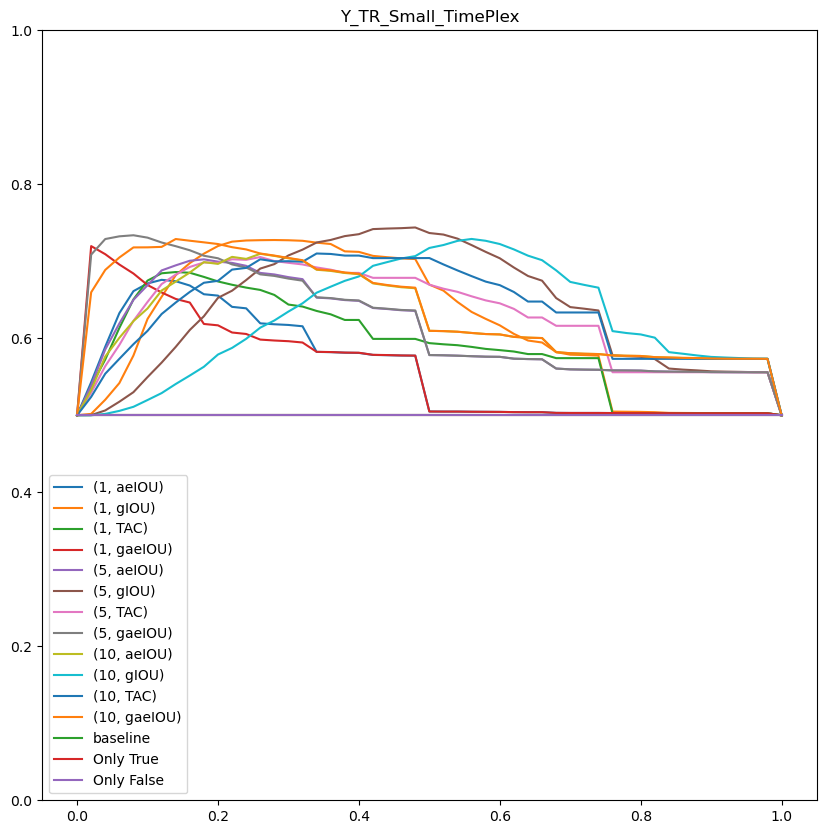

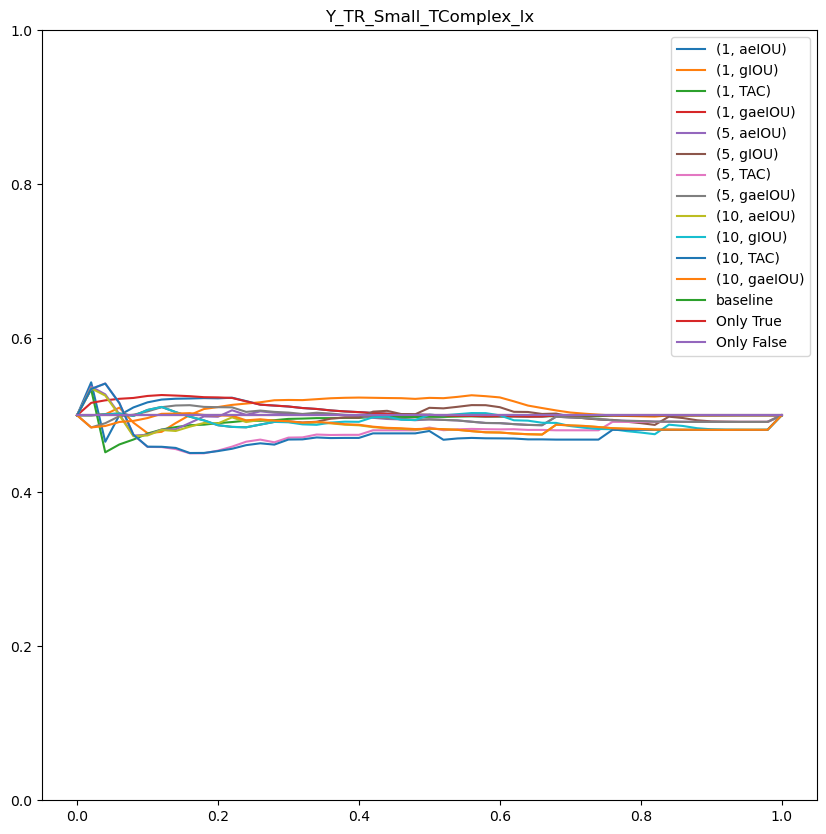

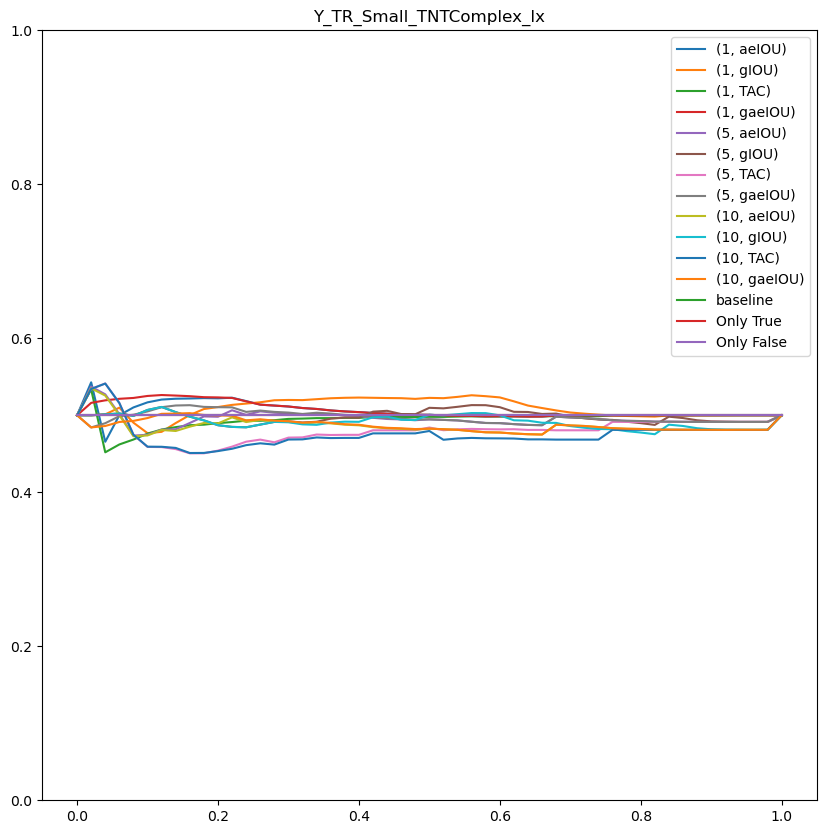

In [10]:
SIZE = "Small"

for granularity in granularities:
	for temporal_scope in temporal_scopes:
		root_res_server = f"./../Res_server/{temporal_scope}_{granularity}_{SIZE}/"
		root_data= f"./../data/{temporal_scope}_{granularity}_{SIZE}/ValidationTask/"

		gt = pd.read_csv(f"{root_data}test.gt", names=[("GT", "GT")])
		try: 
			for model in MODELS: 
				print(model)
				res = pickle.load(open(f"{root_res_server}/{model}_test_time_scores_analysis", "rb"))
				data = []
				columns = res["scores_dict"].keys()
				for i in range(len(gt)):
					data.append([])
					for k in columns:
						data[-1].append(float(res["scores_dict"][k][i]))
				pred = pd.DataFrame(data, columns=columns)
				pred = pred.merge(right_index=True, left_index=True, right=gt)

				res = []
				pres = 4
				s, e, step = (0, 1.0001, 0.02)
				for t in tqdm(np.arange(s, e, step)):
					res.append([])
					for k in [1,5,10]:
						for metric in ["aeIOU", "gIOU", "TAC", "gaeIOU"]:
							# print("\t", k, sum(pred[[k, "GT"]].apply(lambda x: (x[k] > t) == x["GT"], axis=1)))
							#acc_neg = np.around(sum(pred[[(k, metric), ("GT", "GT")]][pred[("GT", "GT")] == False].apply(lambda x: (x[(k, metric)] >= t) == x[("GT", "GT")], axis=1))/sum(pred[("GT", "GT")] == False), pres)
							#acc_pos = np.around(sum(pred[[(k, metric), ("GT", "GT")]][pred[("GT", "GT")] == True].apply(lambda x: (x[(k, metric)] >= t) == x[("GT", "GT")], axis=1))/sum(pred[("GT", "GT")] == True), pres)
							acc = np.around(sum(pred[[(k, metric), ("GT", "GT")]].apply(lambda x: (x[(k, metric)] > t) == x[("GT", "GT")], axis=1))/len(pred), pres)
							res[-1].append(acc)
							# res[-1].append(acc_pos)
							# res[-1].append(acc_neg)
				# pd.DataFrame(res, index=np.arange(0,1.01,0.05), columns=[(k, metric+metric_selected) for k in [1,5,10] for metric in ["aeIOU", "gIOU", "TAC"] for metric_selected in ["", "_pos", "_neg"]])
				final_pred = pd.DataFrame(res, index=np.arange(s, e, step), columns=[(k, metric) for k in [1,5,10] for metric in ["aeIOU", "gIOU", "TAC", "gaeIOU"]])
				final_pred["baseline"] = np.ones(len(final_pred.index))*0.5
				final_pred["Only True"] = np.ones(len(final_pred.index))*pred[("GT", "GT")].value_counts()[True]/sum(pred[("GT", "GT")].value_counts())
				final_pred["Only False"] = np.ones(len(final_pred.index))*pred[("GT", "GT")].value_counts()[False]/sum(pred[("GT", "GT")].value_counts())
				final_pred.plot(ylim=[0,1], figsize=(10,10), title=f"{granularity}_{temporal_scope}_{SIZE}_{model}")
		except:
			print(f"/{temporal_scope}_{granularity}_{SIZE} could not be computed")